## ACCIDENTES DE TRÁFICO EN BARCELONA##


El objetivo de este trabajo es analizar a través de tablas y gráficos los perfiles (edad y sexo) de las personas que más están involucradas en accidentes de tráfico y visualizar a través de un mapa la localización de los accidentes que han causado la muerte de las víctimas. Los datos los descargamos de la págína del ayuntamiento de Barcelona de los años 2016 y 2017 e involucra un archivo CSV: Personas involucradas. 

## Limpieza de datos##

Importación librerías para poder trabajar las bases

In [1]:
import pandas as pd
import re
from datetime import date, datetime

Exportación de la base personas involucradas en accidentes 2017

In [2]:
vict1_17 = pd.read_csv('2017_accidents_persones_gu_bcn_.csv', index_col=False)
# vict1_17.head()
vict1_17.loc[258]

Número_d'expedient                       2017S000210    
Codi_districte                                         2
Nom districte                                   Eixample
Codi_barri                                             6
Nom_barri                             la Sagrada Família
Codi_carrer                                        18505
Nom carrer                                         Aragó
Num_postal                                     0429 0429
Descripció_dia_setmana                           Dimarts
Dia setmana                                           Dm
Descripció tipus dia                             Laboral
NK Any                                              2017
Mes de any                                             1
Nom mes                                            Gener
Dia de mes                                            10
Descripció torn                                     Matí
Hora de dia                                            8
Descripció causa vianant       

Inspección de los tipos de datos

In [3]:
vict1_17.dtypes

Número_d'expedient              object
Codi_districte                   int64
Nom districte                   object
Codi_barri                       int64
Nom_barri                       object
Codi_carrer                      int64
Nom carrer                      object
Num_postal                      object
Descripció_dia_setmana          object
Dia setmana                     object
Descripció tipus dia            object
NK Any                           int64
Mes de any                       int64
Nom mes                         object
Dia de mes                       int64
Descripció torn                 object
Hora de dia                      int64
Descripció causa vianant        object
Desc._Tipus_vehicle_implicat    object
Descripció_sexe                 object
Edat                            object
Descripció_tipus_persona        object
Descripció_situació             object
Descripció_victimització        object
Coordenada_UTM_(X)              object
Coordenada_UTM_(Y)       

Inspeccionar la cantidad de filas y columnas (12148 filas y 28 columnas)

In [4]:
vict1_17.shape

(12148, 28)

Exportamos la base de las personas involucradas en accidentes 2016

In [5]:
vict1_16 = pd.read_csv('2016_accidents_persones_gu_bcn.csv', index_col=False)
vict1_16.head(3)

,Número_d'expedient,Codi_districte,Nom districte,Codi_barri,Nom_barri,Codi_carrer,Nom carrer,Num_postal,Descripció_dia_setmana,Dia setmana,...,Desc._Tipus_vehicle_implicat,Descripció_sexe,Edat,Descripció_tipus_persona,Descripció_situació,Descripció_victimització,Coordenada_UTM_(X),Coordenada_UTM_(Y),Long,Lat
0,2016S000001,2,Eixample,7,la Dreta de l'Eixample,144601,Diagonal,0361B0361B,Divendres,Dv,...,Taxi,Home,41,Conductor,Presentado,Ferit lleu,"430142,09","4583396,02","2,163202","41,397223"
1,2016S000002,1,Ciutat Vella,3,la Barceloneta,194202,Mar,0022 0022,Divendres,Dv,...,Motocicleta,Home,19,Passatger,Desconegut,Ferit lleu,"432161,38","4581525,86","2,187562","41,380545"
2,2016S000003,8,Nou Barris,53,la Trinitat Nova,209900,Meridiana,0595X0595X,Divendres,Dv,...,Motocicleta,Home,24,Conductor,Presentado,Ferit lleu,"432262,30","4589063,89","2,187925","41,448446"


Inspeccionar los tipos de datos

In [6]:
vict1_16.dtypes 

Número_d'expedient              object
Codi_districte                   int64
Nom districte                   object
Codi_barri                       int64
Nom_barri                       object
Codi_carrer                      int64
Nom carrer                      object
Num_postal                      object
Descripció_dia_setmana          object
Dia setmana                     object
Descripció tipus dia            object
NK Any                           int64
Mes de any                       int64
Nom mes                         object
Dia de mes                       int64
Descripció torn                 object
Hora de dia                      int64
Descripció causa vianant        object
Desc._Tipus_vehicle_implicat    object
Descripció_sexe                 object
Edat                            object
Descripció_tipus_persona        object
Descripció_situació             object
Descripció_victimització        object
Coordenada_UTM_(X)              object
Coordenada_UTM_(Y)       

Inspeccionar la cantidad de filas y columnas (12072 filas y 28 columnas)

In [7]:
vict1_16.shape

(12072, 28)

Juntar las bases 2017 y 2016 de las personas involucradas y seleccionar/renombrar las columnas que nos interesa

In [8]:
# Juntar base 2017 y 2016 de personas involucradas 
victi = vict1_17.append(vict1_16, ignore_index=False, verify_integrity=False, sort=None)

# Seleccionar las columnas que nos interesan
vict_red = victi.iloc[:,[0,2,8,10,11,12,14,15,19,20,21,23,24,25]]

# Renombrar la columnas
vict_red.rename(columns={"Número_d'expedient":'NumExpediente','Nom districte': 'Distrito',
                               'Descripció_dia_setmana': 'DiaSemana','Descripció tipus dia':'TipoDia','NK Any':'Ano',
                               'Mes de any':'Mes','Dia de mes':'Dia','Descripció_sexe':'Sexo','Edat':'Edad',
                               'Descripció_tipus_persona':'TipoPersona','Descripció_victimització':'TriajeVictima',
                               'Coordenada_UTM_(X)':'C_UTM_X','Coordenada_UTM_(Y)':'C_UTM_Y','Descripció torn':'Horario'},
                      inplace=True)
vict_red.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,NumExpediente,Distrito,DiaSemana,TipoDia,Ano,Mes,Dia,Horario,Sexo,Edad,TipoPersona,TriajeVictima,C_UTM_X,C_UTM_Y
0,2017S000001,Sarrià-Sant Gervasi,Diumenge,Laboral,2017,1,1,Nit,Home,50,Conductor,Ferit lleu,"428887,27","4583659,10"
1,2017S000002,Eixample,Diumenge,Laboral,2017,1,1,Nit,Home,47,Conductor,Ferit lleu,"431987,02","4583282,61"
2,2017S000004,Eixample,Diumenge,Laboral,2017,1,1,Matí,Dona,27,Conductor,Ferit lleu,"431615,63","4583971,63"
3,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,1,Matí,Dona,40,Passatger,Ferit lleu,"432466,78","4583327,27"
4,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,1,Matí,Home,37,Conductor,Ferit lleu,"432466,78","4583327,27"


Inspeccionar filas y columnas (24220 filas y 14 columnas)

In [9]:
vict_red.shape

(24220, 14)

Ordenar tabla por nombre de distritos

In [10]:
vict_red.sort_values('Distrito', ascending=True).head(4)

,NumExpediente,Distrito,DiaSemana,TipoDia,Ano,Mes,Dia,Horario,Sexo,Edad,TipoPersona,TriajeVictima,C_UTM_X,C_UTM_Y
10654,2017S009535,Ciutat Vella,Dijous,Laboral,2017,11,16,Tarda,Dona,53,Passatger,Ferit lleu: Hospitalització fins a 24h,"431889,67","4581811,60"
3806,2017S003719,Ciutat Vella,Dimecres,Laboral,2017,4,26,Tarda,Home,62,Conductor,Ferit lleu: Hospitalització fins a 24h,"432525,41","4582138,01"
8859,2017S008007,Ciutat Vella,Dijous,Laboral,2017,9,28,Tarda,Dona,16,Passatger,Ferit lleu: Hospitalització fins a 24h,"432686,05","4581685,09"
8860,2017S008007,Ciutat Vella,Dijous,Laboral,2017,9,28,Tarda,Dona,76,Vianant,Ferit lleu: Rebutja assistència sanitària,"432686,05","4581685,09"


Identificar el día con más accidentes 

In [11]:
vict_red.groupby('DiaSemana', axis=0).count().iloc[:,1].sort_values(ascending=False)

DiaSemana
Divendres    4086
Dijous       4002
Dimecres     3859
Dimarts      3808
Dilluns      3547
Dissabte     2842
Diumenge     2076
Name: Distrito, dtype: int64

Tipo de personas involucradas en más accidentes en los años 2016 y 2017

In [12]:
vict_red.groupby(['TipoPersona','Ano'], axis=0).count().iloc[:,1]

TipoPersona  Ano 
Conductor    2016    8432
             2017    8512
Passatger    2016    2373
             2017    2398
Vianant      2016    1267
             2017    1238
Name: Distrito, dtype: int64

Convertir Edad en int, cambiando todo los Desconegut ('Desconocidos') a 666 para que todas la columna pueda ser considerada int


In [13]:
def cambiar(a):
    if a == 'Desconegut':
        a=666
    return int(a)

vict_red.Edad = vict_red.Edad.apply(cambiar)
vict_red.dtypes


/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


NumExpediente    object
Distrito         object
DiaSemana        object
TipoDia          object
Ano               int64
Mes               int64
Dia               int64
Horario          object
Sexo             object
Edad              int64
TipoPersona      object
TriajeVictima    object
C_UTM_X          object
C_UTM_Y          object
dtype: object

Crear una función para dividir las edades por rangos y aplicarla sobre una nueva columna llamada RangoEdad (sabemos que esta operación implica un gasto de memoria y nunca se aplicaría en un caso real, pero en este caso lo hacemos como ejercicio adicional)

In [14]:
vict_red2 = vict_red.copy()

def rango_edad (fila) :
    valor=''
    if (fila.Edad) == 666 : 
        valor='Desconocido'
    elif 0<=(fila.Edad)<=20: 
        valor='Entre 0 y 20'
    elif 20<(fila.Edad)<=40: 
        valor='Entre 21 y 40'
    elif 40<(fila.Edad)<=60:
        valor='Entre 41 y 60'
    elif 60<(fila.Edad)<=80:
        valor='Entre 61 y 80'
    elif 80<(fila.Edad)<125:
        valor='Entre 81 a más'
    return valor

vict_red2['RangoEdad'] = vict_red2.apply(rango_edad, axis=1) 
vict_red2.groupby('RangoEdad').count().iloc[:,1]

RangoEdad
Desconocido         172
Entre 0 y 20       2235
Entre 21 y 40     12359
Entre 41 y 60      7146
Entre 61 y 80      1817
Entre 81 a más      491
Name: Distrito, dtype: int64

Crear una función para cambiar todas las comas a puntos de la columna de C_UTM_X y castearlo a float

In [15]:
tmp1=vict_red2.copy()

def repcoor(fila):
    b=fila.C_UTM_X 
    if type(fila['C_UTM_X']) is str:
        b = float(fila['C_UTM_X'].replace(',' ,'.'))
    return b 

tmp1['C_UTM_X'] = tmp1.apply(repcoor,axis=1)
tmp1.head()

,NumExpediente,Distrito,DiaSemana,TipoDia,Ano,Mes,Dia,Horario,Sexo,Edad,TipoPersona,TriajeVictima,C_UTM_X,C_UTM_Y,RangoEdad
0,2017S000001,Sarrià-Sant Gervasi,Diumenge,Laboral,2017,1,1,Nit,Home,50,Conductor,Ferit lleu,428887.27,"4583659,10",Entre 41 y 60
1,2017S000002,Eixample,Diumenge,Laboral,2017,1,1,Nit,Home,47,Conductor,Ferit lleu,431987.02,"4583282,61",Entre 41 y 60
2,2017S000004,Eixample,Diumenge,Laboral,2017,1,1,Matí,Dona,27,Conductor,Ferit lleu,431615.63,"4583971,63",Entre 21 y 40
3,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,1,Matí,Dona,40,Passatger,Ferit lleu,432466.78,"4583327,27",Entre 21 y 40
4,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,1,Matí,Home,37,Conductor,Ferit lleu,432466.78,"4583327,27",Entre 21 y 40


Crear una función para cambiar todas las comas a puntos de la columna de C_UTM_X y castearlo a float

In [16]:
tmp2=tmp1.copy()

def repcoor(fila):
    b=fila.C_UTM_Y 
    if type(fila['C_UTM_Y']) is str:
        b = float(fila['C_UTM_Y'].replace(',' ,'.'))
    return b

tmp2['C_UTM_Y'] = tmp2.apply(repcoor,axis=1)
tmp2

,NumExpediente,Distrito,DiaSemana,TipoDia,Ano,Mes,Dia,Horario,Sexo,Edad,TipoPersona,TriajeVictima,C_UTM_X,C_UTM_Y,RangoEdad
0,2017S000001,Sarrià-Sant Gervasi,Diumenge,Laboral,2017,1,1,Nit,Home,50,Conductor,Ferit lleu,428887.27,4583659.10,Entre 41 y 60
1,2017S000002,Eixample,Diumenge,Laboral,2017,1,1,Nit,Home,47,Conductor,Ferit lleu,431987.02,4583282.61,Entre 41 y 60
2,2017S000004,Eixample,Diumenge,Laboral,2017,1,1,Matí,Dona,27,Conductor,Ferit lleu,431615.63,4583971.63,Entre 21 y 40
3,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,1,Matí,Dona,40,Passatger,Ferit lleu,432466.78,4583327.27,Entre 21 y 40
4,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,1,Matí,Home,37,Conductor,Ferit lleu,432466.78,4583327.27,Entre 21 y 40
5,2017S000006,Ciutat Vella,Diumenge,Laboral,2017,1,1,Matí,Home,61,Vianant,Ferit lleu,430384.25,4582001.59,Entre 61 y 80
6,2017S000008,Eixample,Diumenge,Laboral,2017,1,1,Matí,Dona,31,Passatger,Ferit lleu,430197.72,4583116.33,Entre 21 y 40
7,2017S000008,Eixample,Diumenge,Laboral,2017,1,1,Matí,Home,35,Conductor,Ferit lleu,430197.72,4583116.33,Entre 21 y 40
8,2017S000009,Sants-Montjuïc,Diumenge,Laboral,2017,1,1,Tarda,Dona,35,Conductor,Ferit lleu,428117.94,4581559.38,Entre 21 y 40
9,2017S000010,Sant Andreu,Diumenge,Laboral,2017,1,1,Matí,Dona,91,Passatger,Ferit lleu,431588.98,4586110.37,Entre 81 a más


Castear Ano a Str

In [17]:
def camstr(fila):
    c = fila.Ano
    return str(c)

tmp2['Ano'] = tmp2.apply(camstr,axis=1)
tmp2.dtypes

NumExpediente     object
Distrito          object
DiaSemana         object
TipoDia           object
Ano               object
Mes                int64
Dia                int64
Horario           object
Sexo              object
Edad               int64
TipoPersona       object
TriajeVictima     object
C_UTM_X          float64
C_UTM_Y          float64
RangoEdad         object
dtype: object

Castear Mes a Str

In [18]:
def camstr(fila):
    c = fila.Mes
    return str(c)

tmp2['Mes'] = tmp2.apply(camstr,axis=1)
tmp2.dtypes

NumExpediente     object
Distrito          object
DiaSemana         object
TipoDia           object
Ano               object
Mes               object
Dia                int64
Horario           object
Sexo              object
Edad               int64
TipoPersona       object
TriajeVictima     object
C_UTM_X          float64
C_UTM_Y          float64
RangoEdad         object
dtype: object

Castear Dia a Str

In [19]:
def camstr(fila):
    return str(fila.Dia)

tmp2['Dia'] = tmp2.apply(camstr,axis=1)
tmp2.head()


,NumExpediente,Distrito,DiaSemana,TipoDia,Ano,Mes,Dia,Horario,Sexo,Edad,TipoPersona,TriajeVictima,C_UTM_X,C_UTM_Y,RangoEdad
0,2017S000001,Sarrià-Sant Gervasi,Diumenge,Laboral,2017,1,1,Nit,Home,50,Conductor,Ferit lleu,428887.27,4583659.10,Entre 41 y 60
1,2017S000002,Eixample,Diumenge,Laboral,2017,1,1,Nit,Home,47,Conductor,Ferit lleu,431987.02,4583282.61,Entre 41 y 60
2,2017S000004,Eixample,Diumenge,Laboral,2017,1,1,Matí,Dona,27,Conductor,Ferit lleu,431615.63,4583971.63,Entre 21 y 40
3,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,1,Matí,Dona,40,Passatger,Ferit lleu,432466.78,4583327.27,Entre 21 y 40
4,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,1,Matí,Home,37,Conductor,Ferit lleu,432466.78,4583327.27,Entre 21 y 40


Unificar Dia, Mes y Ano

In [20]:
tmp3 = tmp2.copy()
tmp3['Fecha']= tmp3.Dia +'/'+ tmp3.Mes+'/'+ tmp3.Ano
tmp3.head()

,NumExpediente,Distrito,DiaSemana,TipoDia,Ano,Mes,Dia,Horario,Sexo,Edad,TipoPersona,TriajeVictima,C_UTM_X,C_UTM_Y,RangoEdad,Fecha
0,2017S000001,Sarrià-Sant Gervasi,Diumenge,Laboral,2017,1,1,Nit,Home,50,Conductor,Ferit lleu,428887.27,4583659.10,Entre 41 y 60,1/1/2017
1,2017S000002,Eixample,Diumenge,Laboral,2017,1,1,Nit,Home,47,Conductor,Ferit lleu,431987.02,4583282.61,Entre 41 y 60,1/1/2017
2,2017S000004,Eixample,Diumenge,Laboral,2017,1,1,Matí,Dona,27,Conductor,Ferit lleu,431615.63,4583971.63,Entre 21 y 40,1/1/2017
3,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,1,Matí,Dona,40,Passatger,Ferit lleu,432466.78,4583327.27,Entre 21 y 40,1/1/2017
4,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,1,Matí,Home,37,Conductor,Ferit lleu,432466.78,4583327.27,Entre 21 y 40,1/1/2017


Castear la columna Fecha a datetime.strptime

In [21]:
def fecha(fila):
    a = datetime.strptime(fila.Fecha,'%d/%m/%Y')
    return a
    
tmp3['Fecha'] = tmp3.apply(fecha , axis=1)
tmp3.dtypes

NumExpediente            object
Distrito                 object
DiaSemana                object
TipoDia                  object
Ano                      object
Mes                      object
Dia                      object
Horario                  object
Sexo                     object
Edad                      int64
TipoPersona              object
TriajeVictima            object
C_UTM_X                 float64
C_UTM_Y                 float64
RangoEdad                object
Fecha            datetime64[ns]
dtype: object

Verificación de los cambios 

In [22]:
tmp3[tmp3.Fecha != 0].shape

(24220, 16)

Verificación de la base

In [23]:
tmp3.head()

,NumExpediente,Distrito,DiaSemana,TipoDia,Ano,Mes,Dia,Horario,Sexo,Edad,TipoPersona,TriajeVictima,C_UTM_X,C_UTM_Y,RangoEdad,Fecha
0,2017S000001,Sarrià-Sant Gervasi,Diumenge,Laboral,2017,1,1,Nit,Home,50,Conductor,Ferit lleu,428887.27,4583659.10,Entre 41 y 60,2017-01-01
1,2017S000002,Eixample,Diumenge,Laboral,2017,1,1,Nit,Home,47,Conductor,Ferit lleu,431987.02,4583282.61,Entre 41 y 60,2017-01-01
2,2017S000004,Eixample,Diumenge,Laboral,2017,1,1,Matí,Dona,27,Conductor,Ferit lleu,431615.63,4583971.63,Entre 21 y 40,2017-01-01
3,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,1,Matí,Dona,40,Passatger,Ferit lleu,432466.78,4583327.27,Entre 21 y 40,2017-01-01
4,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,1,Matí,Home,37,Conductor,Ferit lleu,432466.78,4583327.27,Entre 21 y 40,2017-01-01


Cambiar de Catalán a Español la columna DiaSemana

In [24]:
tmp4=tmp3.copy()

def rensem(a):
    if a.DiaSemana == 'Dijous':
        b='jueves'
    elif a.DiaSemana == 'Dilluns':
        b='lunes'
    elif a.DiaSemana == 'Dimarts':
        b='martes'
    elif a.DiaSemana == 'Dimecres':
        b='miercoles'
    elif a.DiaSemana == 'Dissabte':
        b='sabado'
    elif a.DiaSemana == 'Diumenge':
        b='domingo'
    elif a.DiaSemana == 'Divendres':
        b='viernes'
    return b
   
tmp4['DiaSemana'] = tmp4.apply(rensem, axis=1)       
tmp4.groupby('DiaSemana').count().iloc[:,1]    

DiaSemana
domingo      2076
jueves       4002
lunes        3547
martes       3808
miercoles    3859
sabado       2842
viernes      4086
Name: Distrito, dtype: int64

In [25]:
tmp5=tmp4.copy()

def cambiosexo(a):
    if a.Sexo == 'Home':
        b='Hombre'
    elif a.Sexo == 'Dona':
        b='Mujer'
    elif a.Sexo == 'Desconegut':
        b='Desconocido'
    return b
   
tmp5['Sexo'] = tmp5.apply(cambiosexo, axis=1)       
tmp5.groupby('Sexo').count().iloc[:,1]  

Sexo
Desconocido      451
Hombre         14469
Mujer           9300
Name: Distrito, dtype: int64

## Gráfico

Gráfico de los accidentes dividido por las variables de Sexo y Rango Edad. En conclusión, los hombres entre la edad de 21 y 40 años están involucrados en mayor cantidad de accidentes vs. total de personas involucradas. 

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [27]:
rcParams['figure.figsize'] = 12, 12
sns.set_context('talk')

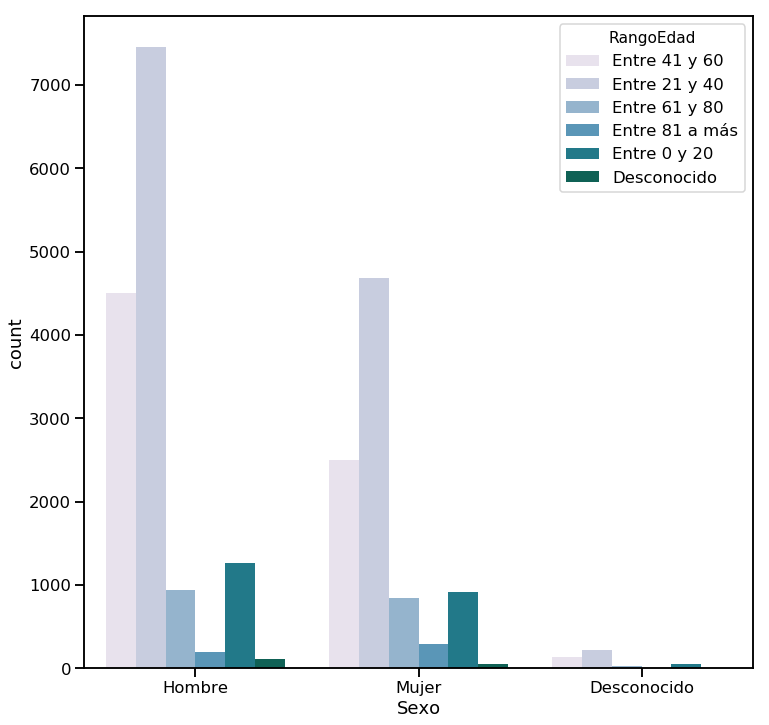

In [28]:
out = sns.countplot(x='Sexo', hue='RangoEdad', data=tmp5,palette='PuBuGn')

Gráfico de los accidentes dividido por las variables de Día de la semana y Rango Edad. En conclusión, el día de la semana de más accidentes es el Viernes y el rango de edad de las personas involucradas es entre 21 y 40 años.

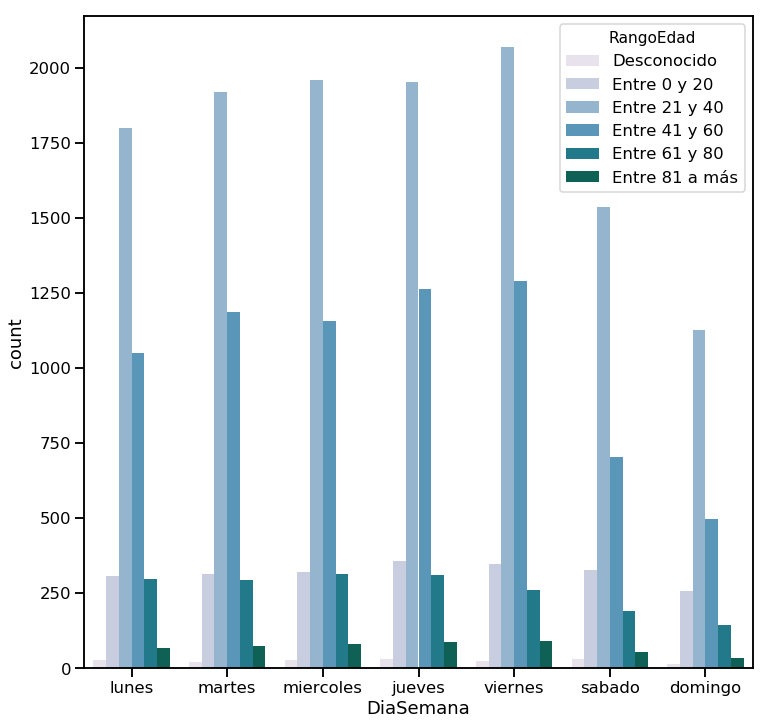

In [29]:
out=sns.countplot(x='DiaSemana',hue='RangoEdad',data=tmp5,
                  hue_order=['Desconocido','Entre 0 y 20','Entre 21 y 40','Entre 41 y 60','Entre 61 y 80','Entre 81 a más'],
                  palette='PuBuGn', order=['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo'])

## Mapas 

Importación de paquetes

Nota: para el paquete utm se debe installar por medio de: pip install utm

In [30]:
import geopandas as gpd
import folium 
import utm 

Trabajamos unicamente sobre la base de accidentes mortales

In [31]:
tmp8 = tmp5.copy()
M = tmp8[tmp8.TriajeVictima =='Mort']
len(M)

31

Cambiamos las coordenadas UTM a latitud y longitud

In [32]:
M1 = M.copy()

M1['lalo'] = M1.apply(lambda f: utm.to_latlon(f.C_UTM_X, f.C_UTM_Y, 31 ,'T'), axis=1)
M1.head()

,NumExpediente,Distrito,DiaSemana,TipoDia,Ano,Mes,Dia,Horario,Sexo,Edad,TipoPersona,TriajeVictima,C_UTM_X,C_UTM_Y,RangoEdad,Fecha,lalo
124,2017S000104,Nou Barris,jueves,Laboral,2017,1,5,Matí,Hombre,89,Vianant,Mort,431819.04,4587014.09,Entre 81 a más,2017-01-05,"(41.431800206630925, 2.1839563291351185)"
972,2017S000833,Horta-Guinardó,martes,Laboral,2017,1,31,Tarda,Mujer,72,Vianant,Mort,431417.32,4585293.23,Entre 61 y 80,2017-01-31,"(41.41626682420349, 2.179343877514039)"
2110,2017S001832,Horta-Guinardó,lunes,Laboral,2017,3,6,Matí,Mujer,29,Conductor,Mort,431016.83,4585753.22,Entre 21 y 40,2017-03-06,"(41.42037551158483, 2.174499652864413)"
702,2016S000587,Sant Andreu,sabado,Laboral,2016,1,23,Tarda,Hombre,23,Conductor,Mort,432502.93,4587850.91,Entre 21 y 40,2016-01-23,"(41.439394923447196, 2.192047417206565)"
1434,2016S001203,Sants-Montjuïc,martes,Laboral,2016,2,16,Matí,Hombre,40,Conductor,Mort,428177.58,4580971.35,Entre 21 y 40,2016-02-16,"(41.37705834653117, 2.141094063542627)"


Separar la tupla de lat_lon para utilizar la longitud y latitud que por el momento se identifica como object

In [33]:
M2=M1.copy()
M2['latitud'] = M2.apply(lambda f: f.lalo[0], axis=1)
M2['longitud'] = M2.apply(lambda f: f.lalo[1], axis=1)

M2.head(4)

,NumExpediente,Distrito,DiaSemana,TipoDia,Ano,Mes,Dia,Horario,Sexo,Edad,TipoPersona,TriajeVictima,C_UTM_X,C_UTM_Y,RangoEdad,Fecha,lalo,latitud,longitud
124,2017S000104,Nou Barris,jueves,Laboral,2017,1,5,Matí,Hombre,89,Vianant,Mort,431819.04,4587014.09,Entre 81 a más,2017-01-05,"(41.431800206630925, 2.1839563291351185)",41.431800,2.183956
972,2017S000833,Horta-Guinardó,martes,Laboral,2017,1,31,Tarda,Mujer,72,Vianant,Mort,431417.32,4585293.23,Entre 61 y 80,2017-01-31,"(41.41626682420349, 2.179343877514039)",41.416267,2.179344
2110,2017S001832,Horta-Guinardó,lunes,Laboral,2017,3,6,Matí,Mujer,29,Conductor,Mort,431016.83,4585753.22,Entre 21 y 40,2017-03-06,"(41.42037551158483, 2.174499652864413)",41.420376,2.174500
702,2016S000587,Sant Andreu,sabado,Laboral,2016,1,23,Tarda,Hombre,23,Conductor,Mort,432502.93,4587850.91,Entre 21 y 40,2016-01-23,"(41.439394923447196, 2.192047417206565)",41.439395,2.192047


En el mapa podemos ver donde sucedieron los accidentes mortales en Barcelona, que durante el 2016 y 2017 fueron un total de 30 accidentes con 31 personas involucradas

In [34]:
m = folium.Map(location=[41.4075163,2.1491085], zoom_start=12)
M2.apply(lambda f: folium.Marker([f.latitud , f.longitud]).add_to(m), axis=1 )
m

## Calendar heatmaps

Se requiere primero instalar gmpolo por medio del comando pip install calmap

In [35]:
import calmap 
import numpy as np

Pasar la columna fecha a array 

In [36]:
mfechas=np.array(tmp8.Fecha)
mfechas1 = pd.Series(1, index=mfechas)

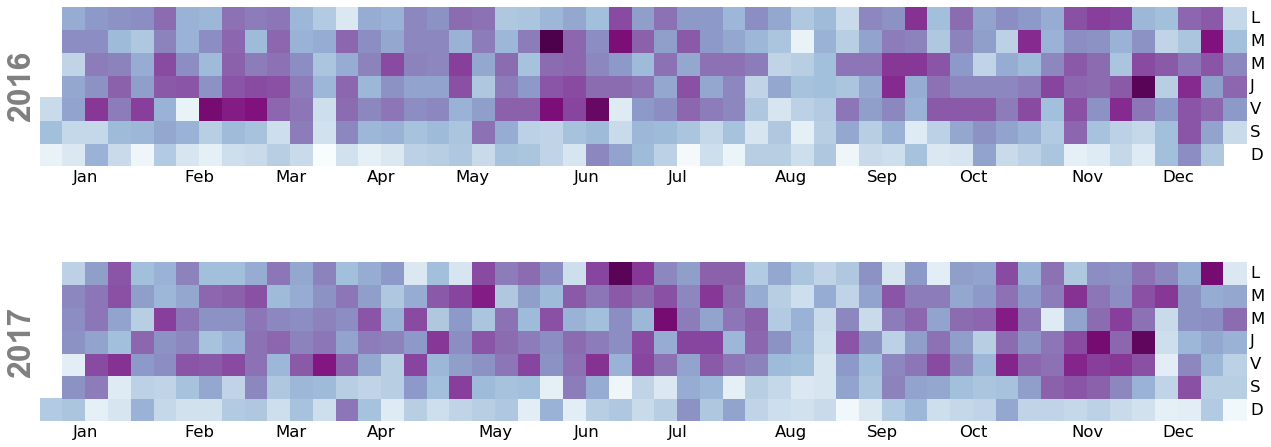

In [37]:
out = calmap.calendarplot(mfechas1, monthticks=1, daylabels='LMMJVSD',
                    dayticks=[0,1, 2,3, 4,5,6], cmap='BuPu',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(18, 8)))

A diferencia de lo que se pueda pensar en la grafica anterior podemos observar que los dias en los cuales tenemos menos accidentes son los sabados y domingos, tanto en el 2016 como en el 2017. Asi mismo, tambien podemos ver que en ambos años el mes en que menos accidentes hay es Agosto. Y donde mas ccidentes tenemos indistintamente del dia fue en diciembre en el 2016 y en Noviembre en el 2017

## Agregar ubicacion en base a latitud y longitud

Comenzar instalando geopy: pip install geopy

In [38]:
from geopy.geocoders import Nominatim

Nos quedamos con los datos que nos importan para buscar la direccion exacta de los accidente mortales segun la latitud y longitud 

In [39]:
M3 = M2.iloc[:,[0,5,15,16]]
M3

,NumExpediente,Mes,Fecha,lalo
124,2017S000104,1,2017-01-05,"(41.431800206630925, 2.1839563291351185)"
972,2017S000833,1,2017-01-31,"(41.41626682420349, 2.179343877514039)"
2110,2017S001832,3,2017-03-06,"(41.42037551158483, 2.174499652864413)"
702,2016S000587,1,2016-01-23,"(41.439394923447196, 2.192047417206565)"
1434,2016S001203,2,2016-02-16,"(41.37705834653117, 2.141094063542627)"
1590,2016S001336,2,2016-02-20,"(41.39365549700966, 2.130470393114779)"
2169,2016S001812,3,2016-03-07,"(41.40013165910244, 2.1543200804885068)"
2456,2016S002058,3,2016-03-15,"(41.40533073950313, 2.1286867150354487)"
2473,2016S002076,3,2016-03-16,"(41.382810453125295, 2.1586377460875172)"
2564,2016S002160,3,2016-03-18,"(41.38305190618905, 2.18275348327388)"


Hacemos una prueba para sacar la direccion del accidente en base a la latitud y longitud 

In [40]:
geolocator = Nominatim(user_agent="xxx")
geo = geolocator.reverse("41.431800,2.183956")
datos = geo.address
datos

'410, Avinguda Meridiana, Sant Andreu de Palomar, Sant Andreu, Barcelona, BCN, CAT, 08027, España'

Ahora sacamos unicamente el distrito 

In [41]:
datos.split(',')[3]

' Sant Andreu'

Creamos una nueva columna llamada distrito y aplicamos las formulas antes vistas para conseguir el distrito en el que ocurrio el accidente segun la latitud y longitud

In [42]:
M3['Distrito']=M3.apply(lambda fila: geolocator.reverse(fila.lalo).address.split(',')[3],axis=1 )
M3

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,NumExpediente,Mes,Fecha,lalo,Distrito
124,2017S000104,1,2017-01-05,"(41.431800206630925, 2.1839563291351185)",Sant Andreu
972,2017S000833,1,2017-01-31,"(41.41626682420349, 2.179343877514039)",Sant Martí
2110,2017S001832,3,2017-03-06,"(41.42037551158483, 2.174499652864413)",Horta-Guinardó
702,2016S000587,1,2016-01-23,"(41.439394923447196, 2.192047417206565)",Sant Andreu
1434,2016S001203,2,2016-02-16,"(41.37705834653117, 2.141094063542627)",Sants-Montjuïc
1590,2016S001336,2,2016-02-20,"(41.39365549700966, 2.130470393114779)",Sarrià - Sant Gervasi
2169,2016S001812,3,2016-03-07,"(41.40013165910244, 2.1543200804885068)",Gràcia
2456,2016S002058,3,2016-03-15,"(41.40533073950313, 2.1286867150354487)",Sant Gervasi - la Bonanova
2473,2016S002076,3,2016-03-16,"(41.382810453125295, 2.1586377460875172)",Eixample
2564,2016S002160,3,2016-03-18,"(41.38305190618905, 2.18275348327388)",Sant Pere


En el siguiente cuadro podemos observar que en el distrito en que tuvimos más accidentes mortales fue en 'Eixample'

In [43]:
M4 = M3.copy()

M4.groupby('Distrito').count().iloc[:,1].sort_values(ascending=False)


Distrito
 Eixample                      5
 Sarrià - Sant Gervasi         3
 Sants-Montjuïc                3
 Sant Andreu                   3
 Horta-Guinardó                3
 la Guineueta                  2
 Gràcia                        2
 Ciutat Vella                  2
 Barcelona                     2
 les Corts                     1
 Vallcarca i els Penitents     1
 Santa Caterina i la Ribera    1
 Sant Pere                     1
 Sant Martí                    1
 Sant Gervasi - la Bonanova    1
Name: Mes, dtype: int64